In [32]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [33]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [34]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

28 10
wvfrm = 
l =  0  SNR =  12.836287786900684  m1 =  28  m2 =  10


10 18
wvfrm = 
l =  1  SNR =  12.624173562778351  m1 =  10  m2 =  18
30 30
wvfrm = 
l =  2  SNR =  17.91780555229525  m1 =  30  m2 =  30
13 27
wvfrm = 
l =  3  SNR =  12.064710780931849  m1 =  13  m2 =  27
30 25
wvfrm = 
l =  4  SNR =  38.06190762089259  m1 =  30  m2 =  25
15 20
wvfrm = 
l =  5  SNR =  18.294982973138566  m1 =  15  m2 =  20
22 15
wvfrm = 
l =  6  SNR =  17.895784640420107  m1 =  22  m2 =  15
24 20
wvfrm = 
l =  7  SNR =  39.77055863950827  m1 =  24  m2 =  20
29 22
wvfrm = 
l =  8  SNR =  16.255913069876048  m1 =  29  m2 =  22
11 11
wvfrm = 
l =  9  SNR =  6.456756056394498  m1 =  11  m2 =  11
11 29
wvfrm = 
l =  10  SNR =  8.712845383712844  m1 =  11  m2 =  29
23 29
wvfrm = 
l =  11  SNR =  13.02288053735792  m1 =  23  m2 =  29
15 28
wvfrm = 
l =  12  SNR =  20.998886973888588  m1 =  15  m2 =  28
14 22
wvfrm = 
l =  13  SNR =  20.636469499014947  m1 =  14  m2 =  22
26 10
wvfrm = 
l =  14  SNR =  8.983362585636142  m1 =  26  m2 =  10
14 20
wvfrm = 
l =  15  SNR =  9.911

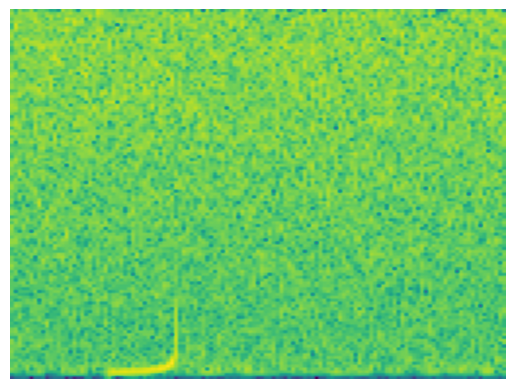

In [35]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)

    plt.savefig(
        f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
        bbox_inches="tight",
        pad_inches=0,
    )
    l += 1

In [36]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 10
wvfrm = 


l =  100  SNR =  8.849673929127965  m1 =  19  m2 =  10
30 24
wvfrm = 
l =  101  SNR =  14.297017358309034  m1 =  30  m2 =  24
25 17
wvfrm = 
l =  102  SNR =  11.452427601115767  m1 =  25  m2 =  17
25 12
wvfrm = 
l =  103  SNR =  17.00324406484661  m1 =  25  m2 =  12
19 16
wvfrm = 
l =  104  SNR =  11.831797300607168  m1 =  19  m2 =  16
10 27
wvfrm = 
l =  105  SNR =  20.521817341808156  m1 =  10  m2 =  27
30 16
wvfrm = 
l =  105  SNR =  10.57143617854502  m1 =  30  m2 =  16
30 28
wvfrm = 
l =  106  SNR =  23.909631933793715  m1 =  30  m2 =  28
19 25
wvfrm = 
l =  106  SNR =  12.668141895364778  m1 =  19  m2 =  25
15 14
wvfrm = 
l =  107  SNR =  9.6182752501035  m1 =  15  m2 =  14
11 26
wvfrm = 
l =  108  SNR =  18.630810268033144  m1 =  11  m2 =  26
10 20
wvfrm = 
l =  109  SNR =  28.644242597735193  m1 =  10  m2 =  20
19 16
wvfrm = 
l =  109  SNR =  20.924838732780774  m1 =  19  m2 =  16
26 20
wvfrm = 
l =  109  SNR =  17.68475670404546  m1 =  26  m2 =  20
28 15
wvfrm = 
l =  110  SNR

23 12
wvfrm = 
l =  200  SNR =  7.6100234182218145  m1 =  23  m2 =  12
29 24
wvfrm = 
l =  201  SNR =  13.17149029741558  m1 =  29  m2 =  24
18 30
wvfrm = 
l =  202  SNR =  9.616591126356205  m1 =  18  m2 =  30
30 18
wvfrm = 
l =  203  SNR =  10.736311314258549  m1 =  30  m2 =  18
14 11
wvfrm = 
l =  204  SNR =  9.66219449796877  m1 =  14  m2 =  11
14 24
wvfrm = 
l =  205  SNR =  10.066586045963717  m1 =  14  m2 =  24
14 16
wvfrm = 
l =  206  SNR =  10.705687684360152  m1 =  14  m2 =  16
12 23
wvfrm = 
l =  207  SNR =  11.5060410361403  m1 =  12  m2 =  23
10 20
wvfrm = 
l =  208  SNR =  8.17458873352576  m1 =  10  m2 =  20
21 21
wvfrm = 
l =  209  SNR =  10.77572643752818  m1 =  21  m2 =  21
15 22
wvfrm = 
l =  210  SNR =  10.605579482717781  m1 =  15  m2 =  22
19 14
wvfrm = 
l =  211  SNR =  6.7996217109760355  m1 =  19  m2 =  14
20 22
wvfrm = 
l =  212  SNR =  12.282176160238949  m1 =  20  m2 =  22
13 13
wvfrm = 
l =  213  SNR =  7.051985954780429  m1 =  13  m2 =  13
11 27
wvfrm = 
l

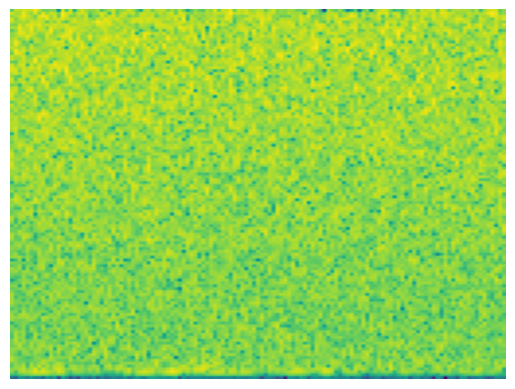

In [ ]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 29
wvfrm = 
l =  300  SNR =  12.48149408281523  m1 =  24  m2 =  29
30 30
wvfrm = 
l =  301  SNR =  12.962559599932533  m1 =  30  m2 =  30
29 30
wvfrm = 
l =  302  SNR =  16.43782252967998  m1 =  29  m2 =  30
28 16
wvfrm = 
l =  303  SNR =  11.632669862586896  m1 =  28  m2 =  16
15 18
wvfrm = 
l =  304  SNR =  9.02608613968697  m1 =  15  m2 =  18
28 24
wvfrm = 
l =  305  SNR =  12.044684946731131  m1 =  28  m2 =  24
16 14
wvfrm = 
l =  306  SNR =  7.766799590475513  m1 =  16  m2 =  14
10 25
wvfrm = 
l =  307  SNR =  10.610297501602028  m1 =  10  m2 =  25
27 29
wvfrm = 
l =  308  SNR =  12.844497299483361  m1 =  27  m2 =  29
15 25
wvfrm = 
l =  309  SNR =  14.939833806679244  m1 =  15  m2 =  25
14 24
wvfrm = 
l =  310  SNR =  12.100572125331238  m1 =  14  m2 =  24
24 12
wvfrm = 
l =  311  SNR =  8.374384818090379  m1 =  24  m2 =  12
10 26
wvfrm = 
l =  312  SNR =  10.762971499796862  m1 =  10  m2 =  26
29 18
wvfrm = 
l =  313  SNR =  12.481954137269398  m1 =  29  m2 =  18
16 10
wvfrm 

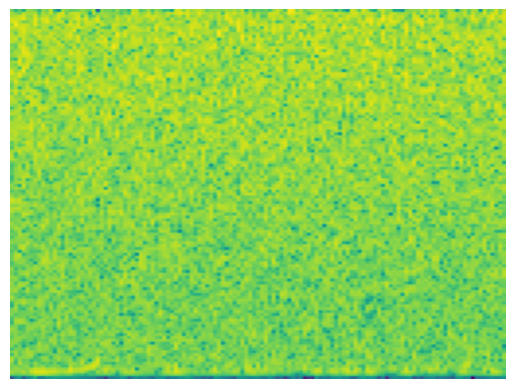

In [ ]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 23
wvfrm = 
l =  400  SNR =  9.214981840789852  m1 =  17  m2 =  23
22 17
wvfrm = 
l =  401  SNR =  8.135754470479567  m1 =  22  m2 =  17
17 15
wvfrm = 
l =  402  SNR =  10.952223496476137  m1 =  17  m2 =  15
19 30
wvfrm = 
l =  403  SNR =  16.59135337448383  m1 =  19  m2 =  30
13 29
wvfrm = 
l =  404  SNR =  10.063618970316801  m1 =  13  m2 =  29
16 11
wvfrm = 
l =  405  SNR =  8.20204593511334  m1 =  16  m2 =  11
29 13
wvfrm = 
l =  406  SNR =  11.462432252011471  m1 =  29  m2 =  13
29 26
wvfrm = 
l =  407  SNR =  15.118971732761514  m1 =  29  m2 =  26
23 10
wvfrm = 
l =  408  SNR =  9.608835809071  m1 =  23  m2 =  10
26 24
wvfrm = 
l =  409  SNR =  10.295396467395983  m1 =  26  m2 =  24
14 16
wvfrm = 
l =  410  SNR =  11.632743893042667  m1 =  14  m2 =  16
26 16
wvfrm = 
l =  411  SNR =  8.097864684610638  m1 =  26  m2 =  16
29 13
wvfrm = 
l =  412  SNR =  13.337470815406556  m1 =  29  m2 =  13
30 29
wvfrm = 
l =  413  SNR =  17.799879235413925  m1 =  30  m2 =  29
18 15
wvfrm = 
l

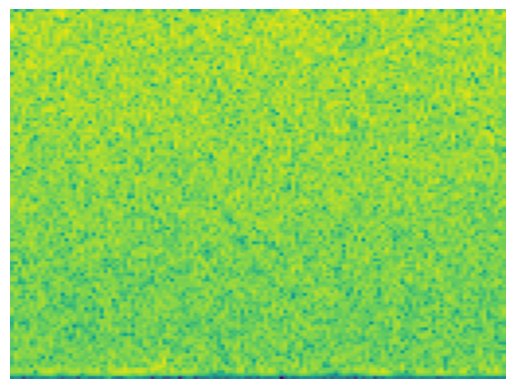

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 11
wvfrm = 
l =  500  SNR =  10.64285861607971  m1 =  18  m2 =  11
23 16
wvfrm = 
l =  501  SNR =  12.097086792553362  m1 =  23  m2 =  16
17 28
wvfrm = 
l =  502  SNR =  11.194264416411837  m1 =  17  m2 =  28
13 22
wvfrm = 
l =  503  SNR =  9.91264326063261  m1 =  13  m2 =  22
21 20
wvfrm = 
l =  504  SNR =  12.387443501457033  m1 =  21  m2 =  20
27 30
wvfrm = 
l =  505  SNR =  10.934634773932432  m1 =  27  m2 =  30
19 16
wvfrm = 
l =  506  SNR =  10.395451655721464  m1 =  19  m2 =  16
24 12
wvfrm = 
l =  507  SNR =  11.5093804414255  m1 =  24  m2 =  12
28 13
wvfrm = 
l =  508  SNR =  8.714288775728159  m1 =  28  m2 =  13
24 13
wvfrm = 
l =  509  SNR =  11.704956139119142  m1 =  24  m2 =  13
19 27
wvfrm = 
l =  510  SNR =  13.506876019870257  m1 =  19  m2 =  27
26 11
wvfrm = 
l =  511  SNR =  6.885776432713184  m1 =  26  m2 =  11
26 15
wvfrm = 
l =  512  SNR =  10.694425164059613  m1 =  26  m2 =  15
24 27
wvfrm = 
l =  513  SNR =  16.96799842548852  m1 =  24  m2 =  27
24 12
wvfrm = 

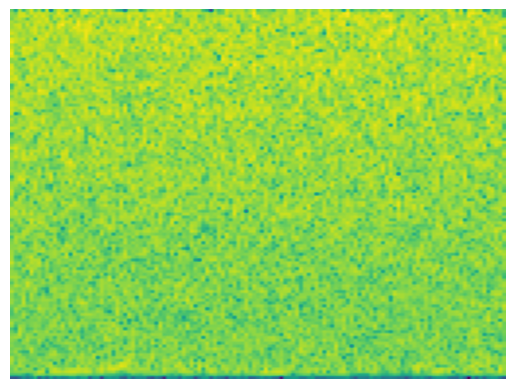

In [ ]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 23
wvfrm = 
l =  600  SNR =  12.521161814491249  m1 =  24  m2 =  23
26 22
wvfrm = 
l =  601  SNR =  10.915367639499346  m1 =  26  m2 =  22
14 20
wvfrm = 
l =  602  SNR =  12.044163333610127  m1 =  14  m2 =  20
13 17
wvfrm = 
l =  603  SNR =  11.115073708741518  m1 =  13  m2 =  17
22 30
wvfrm = 
l =  604  SNR =  13.80368964700184  m1 =  22  m2 =  30
27 15
wvfrm = 
l =  605  SNR =  13.602279633945598  m1 =  27  m2 =  15
22 19
wvfrm = 
l =  606  SNR =  12.583983988207484  m1 =  22  m2 =  19
11 29
wvfrm = 
l =  607  SNR =  8.495070908412274  m1 =  11  m2 =  29
24 11
wvfrm = 
l =  608  SNR =  8.032041073921524  m1 =  24  m2 =  11
21 22
wvfrm = 
l =  609  SNR =  12.550729379072887  m1 =  21  m2 =  22
27 20
wvfrm = 
l =  610  SNR =  12.66802090680498  m1 =  27  m2 =  20
11 15
wvfrm = 
l =  611  SNR =  11.167162396942572  m1 =  11  m2 =  15
24 27
wvfrm = 
l =  612  SNR =  14.497620909372898  m1 =  24  m2 =  27
11 18
wvfrm = 
l =  613  SNR =  10.372341195404712  m1 =  11  m2 =  18
23 13
wvfr

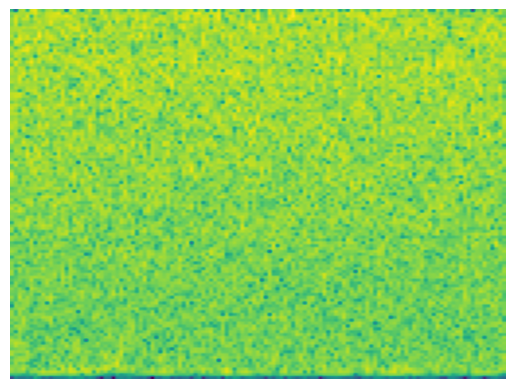

In [ ]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 11
wvfrm = 
l =  700  SNR =  6.05353410985891  m1 =  21  m2 =  11
19 28
wvfrm = 
l =  701  SNR =  13.160678197505863  m1 =  19  m2 =  28
24 18
wvfrm = 
l =  702  SNR =  13.783402074534026  m1 =  24  m2 =  18
24 11
wvfrm = 
l =  703  SNR =  12.450756867866303  m1 =  24  m2 =  11
10 11
wvfrm = 
l =  704  SNR =  6.520034898484704  m1 =  10  m2 =  11
19 15
wvfrm = 
l =  705  SNR =  12.44616709455473  m1 =  19  m2 =  15
21 14
wvfrm = 
l =  706  SNR =  7.893604845986824  m1 =  21  m2 =  14
24 20
wvfrm = 
l =  707  SNR =  11.748123188520154  m1 =  24  m2 =  20
27 27
wvfrm = 
l =  708  SNR =  16.646200394292617  m1 =  27  m2 =  27
10 18
wvfrm = 
l =  709  SNR =  6.798359255952529  m1 =  10  m2 =  18
17 13
wvfrm = 
l =  710  SNR =  7.540868935037873  m1 =  17  m2 =  13
17 24
wvfrm = 
l =  711  SNR =  8.96438717671831  m1 =  17  m2 =  24
29 21
wvfrm = 
l =  712  SNR =  13.034749634882758  m1 =  29  m2 =  21
10 27
wvfrm = 
l =  713  SNR =  7.281172774024795  m1 =  10  m2 =  27
20 13
wvfrm = 
l

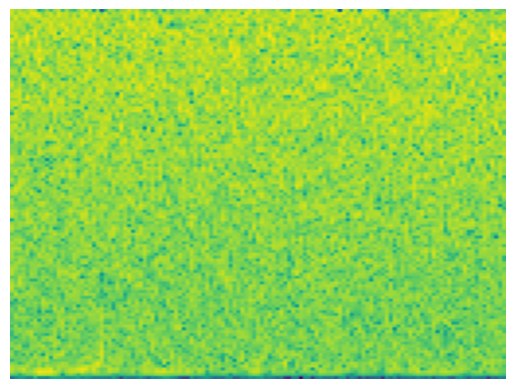

In [ ]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 14
wvfrm = 
l =  800  SNR =  10.092278597890294  m1 =  16  m2 =  14
11 14
wvfrm = 
l =  801  SNR =  8.62196673832827  m1 =  11  m2 =  14
28 17
wvfrm = 
l =  802  SNR =  11.490678849168278  m1 =  28  m2 =  17
28 20
wvfrm = 
l =  803  SNR =  9.827820319499358  m1 =  28  m2 =  20
12 14
wvfrm = 
l =  804  SNR =  9.533327556109553  m1 =  12  m2 =  14
30 10
wvfrm = 
l =  805  SNR =  9.506565410316954  m1 =  30  m2 =  10
12 22
wvfrm = 
l =  806  SNR =  8.78253846165144  m1 =  12  m2 =  22
21 21
wvfrm = 
l =  807  SNR =  11.267968633692695  m1 =  21  m2 =  21
19 12
wvfrm = 
l =  808  SNR =  8.853015681714615  m1 =  19  m2 =  12
29 19
wvfrm = 
l =  809  SNR =  11.239432238974002  m1 =  29  m2 =  19
27 17
wvfrm = 
l =  810  SNR =  10.735680001723123  m1 =  27  m2 =  17
28 21
wvfrm = 
l =  811  SNR =  12.332713127947574  m1 =  28  m2 =  21
20 21
wvfrm = 
l =  812  SNR =  15.124899303246403  m1 =  20  m2 =  21
30 15
wvfrm = 
l =  813  SNR =  16.541688937180115  m1 =  30  m2 =  15
14 28
wvfrm = 

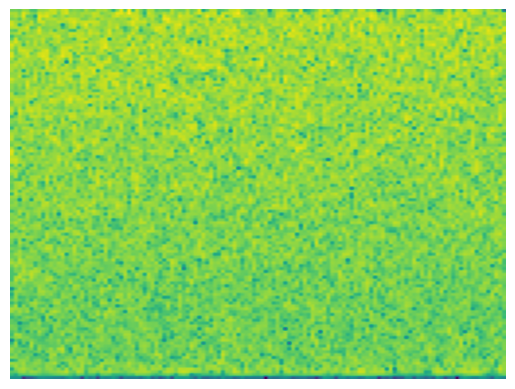

In [ ]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 24
wvfrm = 
l =  900  SNR =  9.209064419353764  m1 =  14  m2 =  24
17 15
wvfrm = 
l =  901  SNR =  10.352744997864782  m1 =  17  m2 =  15
27 25
wvfrm = 
l =  902  SNR =  13.411921050419275  m1 =  27  m2 =  25
27 19
wvfrm = 
l =  903  SNR =  10.720086952256954  m1 =  27  m2 =  19
18 15
wvfrm = 
l =  904  SNR =  8.926417927958475  m1 =  18  m2 =  15
29 23
wvfrm = 
l =  905  SNR =  12.630959330937879  m1 =  29  m2 =  23
16 21
wvfrm = 
l =  906  SNR =  10.094349059805154  m1 =  16  m2 =  21
25 15
wvfrm = 
l =  907  SNR =  10.973357666427235  m1 =  25  m2 =  15
10 12
wvfrm = 
l =  908  SNR =  7.958157461520584  m1 =  10  m2 =  12
19 21
wvfrm = 
l =  909  SNR =  10.770604298055085  m1 =  19  m2 =  21
11 27
wvfrm = 
l =  910  SNR =  8.81127971910471  m1 =  11  m2 =  27
14 18
wvfrm = 
l =  911  SNR =  10.72813495573452  m1 =  14  m2 =  18
17 15
wvfrm = 
l =  912  SNR =  8.461414526677393  m1 =  17  m2 =  15
10 14
wvfrm = 
l =  913  SNR =  7.468972577949768  m1 =  10  m2 =  14
21 20
wvfrm = 

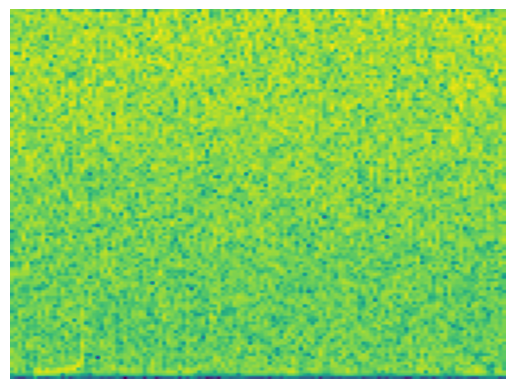

In [ ]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 15
wvfrm = 
l =  1000  SNR =  8.190029862669478  m1 =  26  m2 =  15
20 27
wvfrm = 
l =  1001  SNR =  15.19930073334994  m1 =  20  m2 =  27
26 15
wvfrm = 
l =  1002  SNR =  9.509916115762078  m1 =  26  m2 =  15
29 14
wvfrm = 
l =  1003  SNR =  13.543300224337763  m1 =  29  m2 =  14
15 21
wvfrm = 
l =  1004  SNR =  11.10498727045167  m1 =  15  m2 =  21
16 10
wvfrm = 
l =  1005  SNR =  7.415066334172808  m1 =  16  m2 =  10
25 28
wvfrm = 
l =  1006  SNR =  12.340559522308011  m1 =  25  m2 =  28
13 28
wvfrm = 
l =  1007  SNR =  7.7560990449838165  m1 =  13  m2 =  28
11 13
wvfrm = 
l =  1008  SNR =  8.049738840857062  m1 =  11  m2 =  13
18 30
wvfrm = 
l =  1009  SNR =  9.798592821629166  m1 =  18  m2 =  30
14 10
wvfrm = 
l =  1010  SNR =  6.085421906012462  m1 =  14  m2 =  10
15 10
wvfrm = 
l =  1011  SNR =  6.875176629103669  m1 =  15  m2 =  10
17 27
wvfrm = 
l =  1012  SNR =  8.178050296076613  m1 =  17  m2 =  27
30 16
wvfrm = 
l =  1013  SNR =  9.784971257716252  m1 =  30  m2 =  16
17 

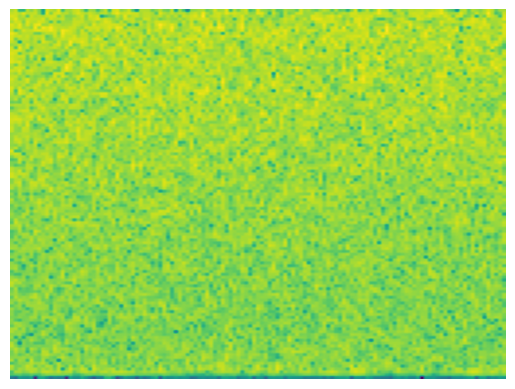

In [ ]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 30
wvfrm = 
l =  1100  SNR =  9.83479382841447  m1 =  10  m2 =  30
24 14
wvfrm = 
l =  1101  SNR =  11.500807353217061  m1 =  24  m2 =  14
10 26
wvfrm = 
l =  1102  SNR =  10.8564627237765  m1 =  10  m2 =  26
19 25
wvfrm = 
l =  1103  SNR =  12.45627869170778  m1 =  19  m2 =  25
14 10
wvfrm = 
l =  1104  SNR =  7.341313183941861  m1 =  14  m2 =  10
15 19
wvfrm = 
l =  1105  SNR =  9.720073233087263  m1 =  15  m2 =  19
18 23
wvfrm = 
l =  1106  SNR =  12.515829704677733  m1 =  18  m2 =  23
22 20
wvfrm = 
l =  1107  SNR =  10.983043886381564  m1 =  22  m2 =  20
27 17
wvfrm = 
l =  1108  SNR =  12.252316581498489  m1 =  27  m2 =  17
10 12
wvfrm = 
l =  1109  SNR =  8.175290814521233  m1 =  10  m2 =  12
19 28
wvfrm = 
l =  1110  SNR =  11.868801226632012  m1 =  19  m2 =  28
26 29
wvfrm = 
l =  1111  SNR =  16.386597138108506  m1 =  26  m2 =  29
14 30
wvfrm = 
l =  1112  SNR =  9.944868412243482  m1 =  14  m2 =  30
19 25
wvfrm = 
l =  1113  SNR =  9.949923699625867  m1 =  19  m2 =  25
15

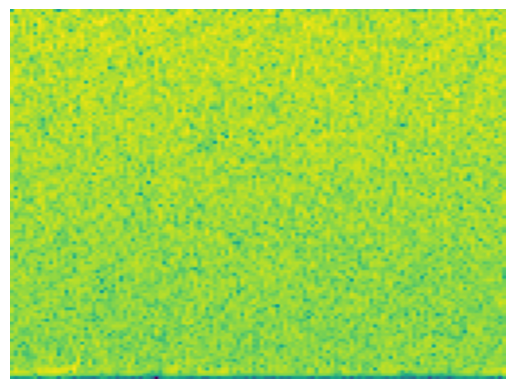

In [ ]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 20
wvfrm = 


l =  1200  SNR =  11.936370411799068  m1 =  20  m2 =  20
23 15
wvfrm = 
l =  1201  SNR =  10.452460543730018  m1 =  23  m2 =  15
12 27
wvfrm = 
l =  1202  SNR =  10.380559124385355  m1 =  12  m2 =  27
27 18
wvfrm = 
l =  1203  SNR =  13.933995088015461  m1 =  27  m2 =  18
26 27
wvfrm = 
l =  1204  SNR =  17.032949674064103  m1 =  26  m2 =  27
19 30
wvfrm = 
l =  1205  SNR =  13.626352213256824  m1 =  19  m2 =  30
15 15
wvfrm = 
l =  1206  SNR =  9.387215911905058  m1 =  15  m2 =  15
20 30
wvfrm = 
l =  1207  SNR =  14.443715219524387  m1 =  20  m2 =  30
27 14
wvfrm = 
l =  1208  SNR =  13.132070914525954  m1 =  27  m2 =  14
10 14
wvfrm = 
l =  1209  SNR =  4.488056298487513  m1 =  10  m2 =  14
18 27
wvfrm = 
l =  1209  SNR =  10.711911569547462  m1 =  18  m2 =  27
15 17
wvfrm = 
l =  1210  SNR =  10.776432626729532  m1 =  15  m2 =  17
30 19
wvfrm = 
l =  1211  SNR =  9.957615826259687  m1 =  30  m2 =  19
11 25
wvfrm = 
l =  1212  SNR =  7.600683490455075  m1 =  11  m2 =  25
12 15
wvfrm

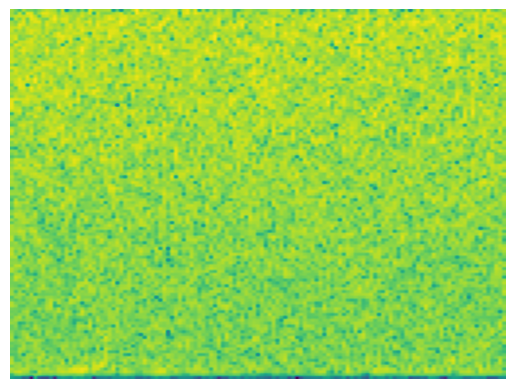

In [ ]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 15
wvfrm = 
l =  1300  SNR =  12.824144774840237  m1 =  24  m2 =  15
21 11
wvfrm = 
l =  1301  SNR =  9.548000819523995  m1 =  21  m2 =  11
14 26
wvfrm = 
l =  1302  SNR =  9.063134361720985  m1 =  14  m2 =  26
18 19
wvfrm = 
l =  1303  SNR =  11.02903393303753  m1 =  18  m2 =  19
26 26
wvfrm = 
l =  1304  SNR =  12.486202279179475  m1 =  26  m2 =  26
18 22
wvfrm = 
l =  1305  SNR =  12.267445646951595  m1 =  18  m2 =  22
12 22
wvfrm = 
l =  1306  SNR =  5.639005174883174  m1 =  12  m2 =  22
29 30
wvfrm = 
l =  1307  SNR =  16.671630756734835  m1 =  29  m2 =  30
29 11
wvfrm = 
l =  1308  SNR =  9.294906775444709  m1 =  29  m2 =  11
27 16
wvfrm = 
l =  1309  SNR =  12.10146049483807  m1 =  27  m2 =  16
29 18
wvfrm = 
l =  1310  SNR =  13.461091653393575  m1 =  29  m2 =  18
16 22
wvfrm = 
l =  1311  SNR =  9.05149892717914  m1 =  16  m2 =  22
12 17
wvfrm = 
l =  1312  SNR =  7.6378164605144905  m1 =  12  m2 =  17
17 28
wvfrm = 
l =  1313  SNR =  14.125166875528425  m1 =  17  m2 =  28


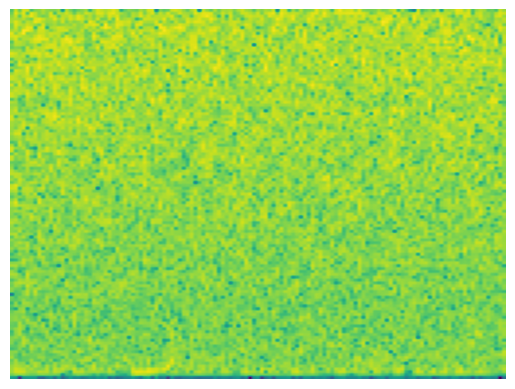

In [ ]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 26
wvfrm = 
l =  1400  SNR =  10.431897095087482  m1 =  12  m2 =  26
23 17
wvfrm = 
l =  1401  SNR =  9.511802735627885  m1 =  23  m2 =  17
20 17
wvfrm = 
l =  1402  SNR =  10.993751496049398  m1 =  20  m2 =  17
19 20
wvfrm = 
l =  1403  SNR =  11.962493834641542  m1 =  19  m2 =  20
19 20
wvfrm = 
l =  1404  SNR =  15.288373610342791  m1 =  19  m2 =  20
28 18
wvfrm = 
l =  1405  SNR =  9.996729684952946  m1 =  28  m2 =  18
28 11
wvfrm = 
l =  1406  SNR =  7.270652316906567  m1 =  28  m2 =  11
12 28
wvfrm = 
l =  1407  SNR =  10.765674379382984  m1 =  12  m2 =  28
10 15
wvfrm = 
l =  1408  SNR =  9.406408766931495  m1 =  10  m2 =  15
14 16
wvfrm = 
l =  1409  SNR =  9.402313848245647  m1 =  14  m2 =  16
26 30
wvfrm = 
l =  1410  SNR =  14.567732349480254  m1 =  26  m2 =  30
11 18
wvfrm = 
l =  1411  SNR =  8.60117512924812  m1 =  11  m2 =  18
19 24
wvfrm = 
l =  1412  SNR =  11.384211764061922  m1 =  19  m2 =  24
10 24
wvfrm = 
l =  1413  SNR =  9.874960851215182  m1 =  10  m2 =  24


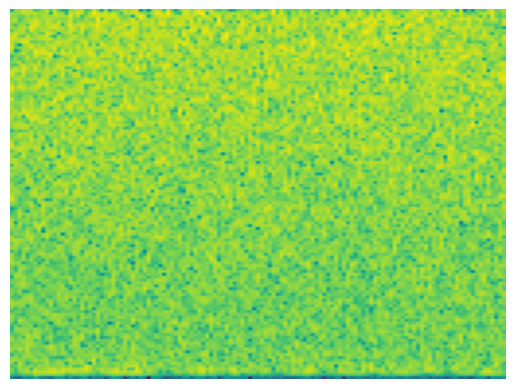

In [ ]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 3000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
